In [3]:
import pandas as pd

file_path = r"C:\Users\chandanasree\OneDrive\Documents\data analyst projects\Dynamic-Pricing\data\Retail_Dataset2.csv.zip"
df = pd.read_csv(file_path)

df.head()

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,Product_0033,Whse_S,Category_005,01/03/2016,16000,1,0,0,0,91
1,786743,Product_1825,Whse_S,Category_006,01/03/2016,50000,1,0,0,0,85
2,786967,Product_0551,Whse_S,Category_030,01/03/2016,3000,1,0,0,0,85
3,786856,Product_0556,Whse_S,Category_030,01/03/2016,1000,1,0,0,0,93
4,899538,Product_1844,Whse_A,Category_018,01/03/2016,7,1,0,0,0,95


In [5]:
df.head

<bound method NDFrame.head of         Product_id  Product_Code Warehouse Product_Category        Date  \
0           786725  Product_0033    Whse_S     Category_005  01/03/2016   
1           786743  Product_1825    Whse_S     Category_006  01/03/2016   
2           786967  Product_0551    Whse_S     Category_030  01/03/2016   
3           786856  Product_0556    Whse_S     Category_030  01/03/2016   
4           899538  Product_1844    Whse_A     Category_018  01/03/2016   
...            ...           ...       ...              ...         ...   
169206      993496  Product_1368    Whse_A     Category_019  11/23/2016   
169207      869587  Product_0094    Whse_S     Category_019  11/23/2016   
169208      898180  Product_2074    Whse_A     Category_009  11/23/2016   
169209      898179  Product_2074    Whse_A     Category_009  11/23/2016   
169210      993497  Product_1368    Whse_A     Category_019  11/23/2016   

        Order_Demand  Open  Promo StateHoliday  SchoolHoliday  Petrol

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.head()

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,Product_0033,Whse_S,Category_005,2016-01-03,16000,1,0,0,0,91
13,899469,Product_1751,Whse_A,Category_001,2016-01-03,10,1,0,0,0,90
12,786963,Product_1387,Whse_S,Category_019,2016-01-03,100,1,0,0,0,91
11,786962,Product_1263,Whse_S,Category_019,2016-01-03,15000,1,0,0,0,85
9,899734,Product_0982,Whse_A,Category_028,2016-01-03,5000,1,0,0,0,92


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169211 entries, 0 to 169210
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product_id        169211 non-null  int64         
 1   Product_Code      169211 non-null  object        
 2   Warehouse         169211 non-null  object        
 3   Product_Category  169211 non-null  object        
 4   Date              169211 non-null  datetime64[ns]
 5   Order_Demand      169211 non-null  int64         
 6   Open              169211 non-null  int64         
 7   Promo             169211 non-null  int64         
 8   StateHoliday      169211 non-null  object        
 9   SchoolHoliday     169211 non-null  int64         
 10  Petrol_price      169211 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 15.5+ MB


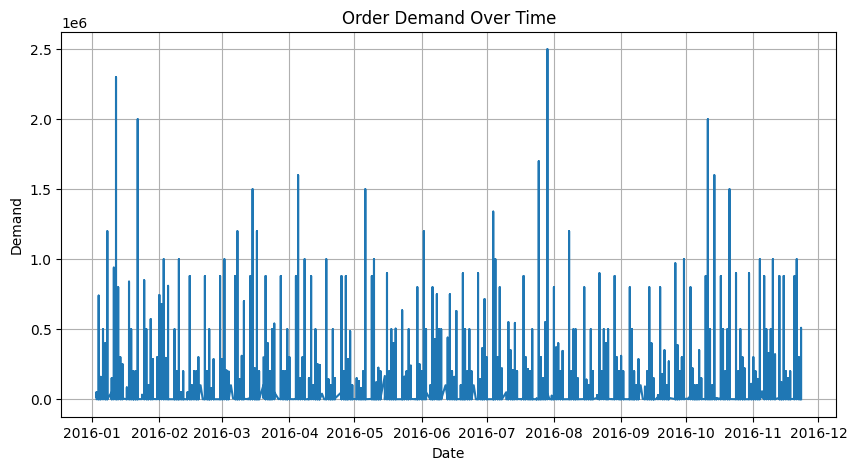

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Order_Demand'])
plt.title('Order Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.grid(True)
plt.show()

In [23]:
df_ts['Order_Demand'] = df_ts['Order_Demand'].ffill()

In [29]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test['Order_Demand'], test['forecast'])
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1563928.8176767677


In [31]:
# Create baseline price (example constant price for simulation)
base_price = 100  # assumed product price in rupees

# Create a dataframe for pricing model
pricing_df = test.copy()
pricing_df['forecast_demand'] = pricing_df['forecast']

# Calculate average forecast demand
avg_demand = pricing_df['forecast_demand'].mean()

# Apply dynamic pricing rule
pricing_df['new_price'] = pricing_df['forecast_demand'].apply(
    lambda x: base_price * 1.10 if x > avg_demand else base_price * 0.90
)

pricing_df.head()

,Order_Demand,forecast,forecast_demand,new_price
Date,,,,
2016-09-19,1375514.0,3.535211e+06,3.535211e+06,110.0
2016-09-20,2653190.0,3.559863e+06,3.559863e+06,110.0
2016-09-21,5217779.0,3.436158e+06,3.436158e+06,110.0
2016-09-22,722062.0,3.354718e+06,3.354718e+06,110.0
2016-09-23,4024845.0,3.461498e+06,3.461498e+06,110.0


In [33]:
pricing_df['original_revenue'] = base_price * pricing_df['Order_Demand']
pricing_df['optimized_revenue'] = pricing_df['new_price'] * pricing_df['Order_Demand']

total_original = pricing_df['original_revenue'].sum()
total_optimized = pricing_df['optimized_revenue'].sum()

total_original, total_optimized

(21933057300.0, 22225067690.0)

In [35]:
improvement = ((total_optimized - total_original) / total_original) * 100
print("Revenue Improvement Percentage: ", improvement, "%")

Revenue Improvement Percentage:  1.3313711171492721 %


In [45]:
pricing_df.to_csv(
    r"C:\Users\chandanasree\OneDrive\Documents\data analyst projects\Dynamic-Pricing\data\dynamic_pricing_output.csv",
    index=True
)